In [30]:
#Loading the dataset

import pandas as pd 

iris_df = pd.read_csv('iris.csv')

In [31]:
#Reviewing dataset

iris_df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [32]:
#Cheking the missing values and data types

iris_df.info()

iris_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
#Check if species column is already numeric (it should be for classification)

iris_df['species'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

iris_df['species'] = le.fit_transform(iris_df['species'])

#Verify the encoding
iris_df['species'].unique()

array([0, 1, 2])

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#Separate features (x) and target (y)
x = iris_df.drop(columns='species')
y = iris_df['species']

#Split the data into 70% training and 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

#Check the shapes of the splits

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
#Train the Decision Tree Classifier

clf = DecisionTreeClassifier( random_state=42 )
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
#Evaluate the Model

from sklearn.metrics import accuracy_score

#Make predictions on the test data
y_pred = clf.predict(x_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

accuracy

1.0

In [40]:
#Visualize the Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

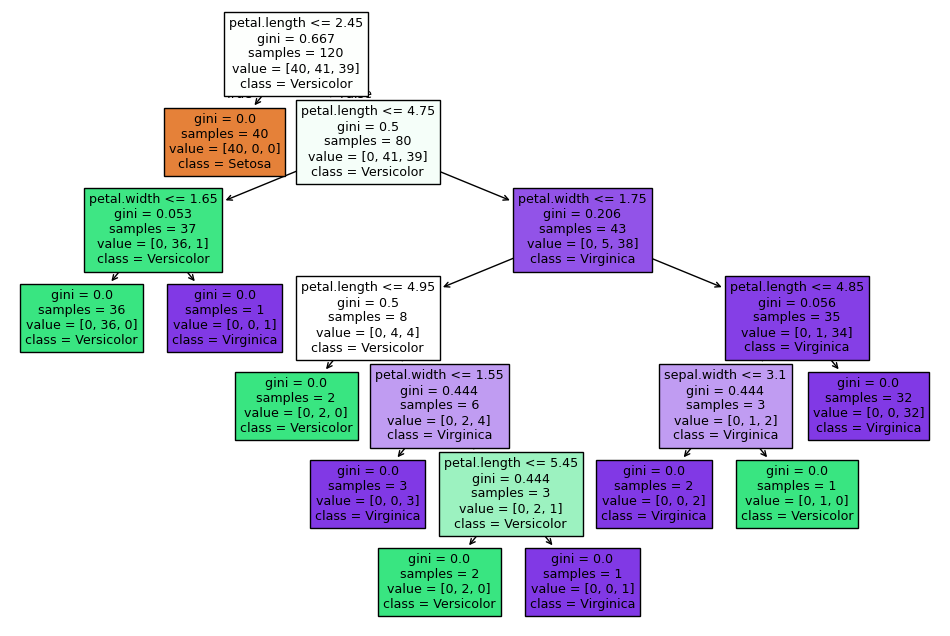

In [44]:
#Visualize the Decision Tree\
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names = iris_df.columns[:-1],class_names = le.classes_)
plt.show()